## Importing libraries

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score

## Data can be downloaded from:
#https://www.kaggle.com/fedesoriano/cirrhosis-prediction-dataset

In [146]:
cirr=pd.read_csv("D:/Spyder/cirrhosis.csv")

# Data Exploration

In [147]:
cirr.shape

(418, 20)

In [148]:
cirr.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [149]:
cirr.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,C,NaN,19358,F,NaN,NaN,NaN,N,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


In [150]:
cirr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [151]:
cirr.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [152]:
cirr.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

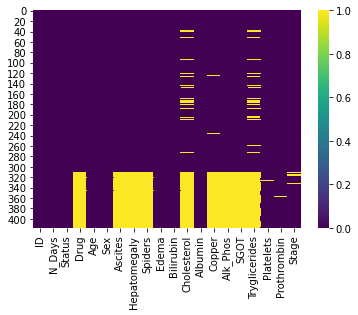

In [153]:
sns.heatmap(cirr.isnull(),cmap='viridis')

In [154]:
cirr.corr()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,1.000000,-0.354305,0.037136,-0.062154,0.032897,-0.128924,-0.098663,-0.352856,-0.012097,-0.034100,-0.076699,-0.191930,-0.033757
N_Days,-0.354305,1.000000,-0.125934,-0.403953,-0.138236,0.430829,-0.364809,0.149269,-0.225492,-0.153000,0.151361,-0.111470,-0.366193
Age,0.037136,-0.125934,1.000000,0.002362,-0.157620,-0.182350,0.061549,-0.047247,-0.149869,0.022065,-0.148201,0.113760,0.189083
Bilirubin,-0.062154,-0.403953,0.002362,1.000000,0.397129,-0.314177,0.456918,0.116984,0.441730,0.436748,-0.013435,0.314894,0.200731
Cholesterol,0.032897,-0.138236,-0.157620,0.397129,1.000000,-0.069733,0.126115,0.149473,0.353246,0.276830,0.191710,-0.030811,0.011164
Albumin,-0.128924,0.430829,-0.182350,-0.314177,-0.069733,1.000000,-0.264771,-0.101456,-0.220047,-0.103417,0.158659,-0.200592,-0.305296
Copper,-0.098663,-0.364809,0.061549,0.456918,0.126115,-0.264771,1.000000,0.187357,0.293829,0.279852,-0.064403,0.218224,0.269400
Alk_Phos,-0.352856,0.149269,-0.047247,0.116984,0.149473,-0.101456,0.187357,1.000000,0.112217,0.180082,0.143733,0.089384,0.041273
SGOT,-0.012097,-0.225492,-0.149869,0.441730,0.353246,-0.220047,0.293829,0.112217,1.000000,0.126119,-0.120147,0.112174,0.164945
Tryglicerides,-0.034100,-0.153000,0.022065,0.436748,0.276830,-0.103417,0.279852,0.180082,0.126119,1.000000,0.103212,0.020122,0.123899


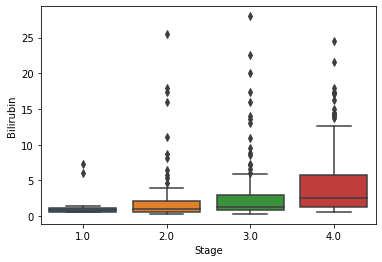

In [155]:
##Boxplots of different columns
sns.boxplot(x='Stage',y='Bilirubin',data=cirr)

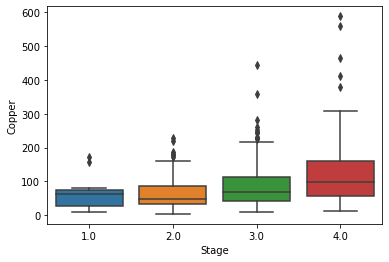

In [156]:
sns.boxplot(x='Stage',y='Copper',data=cirr)

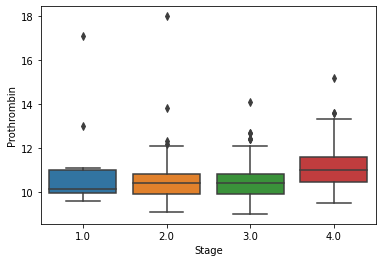

In [157]:
sns.boxplot(x='Stage',y='Prothrombin',data=cirr)

## Feature Engineering

In [158]:
#Convert age from days to years
cirr['Age']=cirr['Age']/365
cirr.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58.805479,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56.484932,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70.120548,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54.778082,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38.131507,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [159]:
#Handling missing values of categorical columns

def count_plot(df,col):
    sns.countplot(x=col,data=df,palette='rainbow')
    
def missing_val(df,col):
    count=0
    for index,row in df.iterrows():
        if pd.isnull(row[col]) and count%2==0:
            df[col].iloc[index]=df[col].value_counts().index[0]
        elif pd.isnull(row[col]) and count%2==1:
            df[col].iloc[index]=df[col].value_counts().index[1]
        count+=1

C:\Users\B SRIDHAR\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


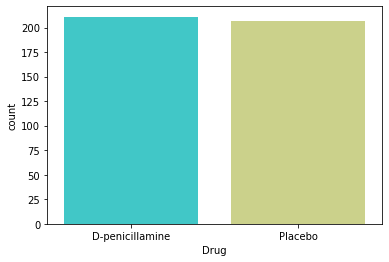

In [160]:
missing_val(cirr,'Drug')
count_plot(cirr,'Drug')

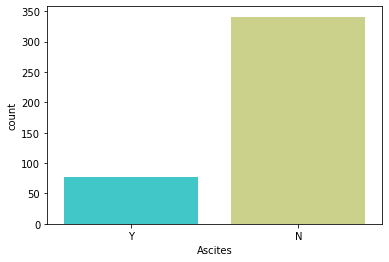

In [161]:
missing_val(cirr,'Ascites')
count_plot(cirr,'Ascites')

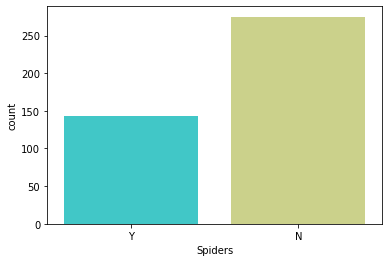

In [162]:
missing_val(cirr,'Spiders')
count_plot(cirr,'Spiders')

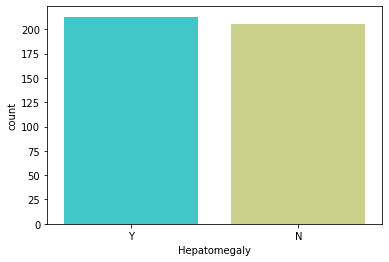

In [163]:
missing_val(cirr,'Hepatomegaly')
count_plot(cirr,'Hepatomegaly')

In [164]:
cirr.isnull().any()

ID               False
N_Days           False
Status           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol       True
Albumin          False
Copper            True
Alk_Phos          True
SGOT              True
Tryglicerides     True
Platelets         True
Prothrombin       True
Stage             True
dtype: bool

In [165]:
#Handling missing values of numerical columns
def fill_na(df):
    return df.fillna(df.mean())
    

In [166]:
num_col=['Cholesterol','Copper','Alk_Phos','SGOT','Tryglicerides','Platelets','Prothrombin']
for x in num_col:
    cirr[x]=fill_na(cirr[x])

In [167]:
cirr.isnull().any()

ID               False
N_Days           False
Status           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage             True
dtype: bool

In [168]:
md=cirr['Stage'].mode()[0]
cirr['Stage'].fillna(value=md,inplace=True)
cirr['Stage'].value_counts()

3.0    161
4.0    144
2.0     92
1.0     21
Name: Stage, dtype: int64

In [169]:
cirr.isnull().any()

ID               False
N_Days           False
Status           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage            False
dtype: bool

In [170]:
cirr.dtypes

ID                 int64
N_Days             int64
Status            object
Drug              object
Age              float64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

## Encoding categorical columns

In [171]:
#Convert objects to labels using label encoder
cat_col=['Status','Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema','Stage']
label_enc=preprocessing.LabelEncoder()
for x in cat_col:
    cirr[x]=label_enc.fit_transform(cirr[x])

In [172]:
cirr.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,2,0,58.805479,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,3
1,2,4500,0,0,56.484932,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,2
2,3,1012,2,0,70.120548,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,3
3,4,1925,2,0,54.778082,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,3
4,5,1504,1,1,38.131507,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,2


In [173]:
cirr.dtypes

ID                 int64
N_Days             int64
Status             int32
Drug               int32
Age              float64
Sex                int32
Ascites            int32
Hepatomegaly       int32
Spiders            int32
Edema              int32
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage              int64
dtype: object

In [174]:
x,y = cirr.drop(['ID','Stage'],axis=1),cirr['Stage']

## Train-Test Split

In [175]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Training and Fitting the models

In [176]:
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
bag=BaggingClassifier()
xtra=ExtraTreesClassifier()
gb=GradientBoostingClassifier()

In [177]:
rf.fit(x_train,y_train)
ada.fit(x_train,y_train)
bag.fit(x_train,y_train)
xtra.fit(x_train,y_train)
gb.fit(x_train,y_train)

GradientBoostingClassifier()

## Predictions

In [178]:
rf_pred=rf.predict(x_test)
ada_pred=ada.predict(x_test)
bag_pred=bag.predict(x_test)
xtra_pred=xtra.predict(x_test)
gb_pred=gb.predict(x_test)

## Evaluation

In [179]:
print('Accuracy of Random forest model is {:.2f}'.format(accuracy_score(y_test,rf_pred)))
print('Accuracy of Adaboost model is {:.2f}'.format(accuracy_score(y_test,ada_pred)))
print('Accuracy of Bagging model is {:.2f}'.format(accuracy_score(y_test,bag_pred)))
print('Accuracy of Extra trees model is {:.2f}'.format(accuracy_score(y_test,xtra_pred)))
print('Accuracy of Gradient boosting model is {:.2f}'.format(accuracy_score(y_test,gb_pred)))

Accuracy of Random forest model is 0.50
Accuracy of Adaboost model is 0.44
Accuracy of Bagging model is 0.43
Accuracy of Extra trees model is 0.44
Accuracy of Gradient boosting model is 0.41


# Accuracy score of all the models is too less. Let's see if we can improve by handling the imbalanced data

In [180]:
#Oversampling of data
class0,class1,class2,class3=cirr['Stage'].value_counts()
count_0=cirr[cirr['Stage']==2] 
count_1=cirr[cirr['Stage']==3]
count_2=cirr[cirr['Stage']==1]
count_3=cirr[cirr['Stage']==0]
print(count_0.shape)
print(count_1.shape)
print(count_2.shape)
print(count_3.shape)


count_1_over=count_1.sample(class0,replace=True)
count_2_over=count_2.sample(class0,replace=True)
count_3_over=count_3.sample(class0,replace=True)
over = pd.concat([count_1_over,count_2_over,count_3_over,count_0], axis=0)
over['Stage'].value_counts()

(161, 20)
(144, 20)
(92, 20)
(21, 20)


3    161
2    161
1    161
0    161
Name: Stage, dtype: int64

In [181]:
x,y = over.drop(['ID','Stage'],axis=1),over['Stage']

In [182]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [183]:
rf_m=RandomForestClassifier(n_estimators=500)
gb_m=GradientBoostingClassifier(n_estimators=200)
ada_m=AdaBoostClassifier(n_estimators=200)
xtra_m=ExtraTreesClassifier(n_estimators=200)
bag_m=BaggingClassifier(n_estimators=200)

rf_m.fit(x_train,y_train)
gb_m.fit(x_train,y_train)
ada_m.fit(x_train,y_train)
xtra_m.fit(x_train,y_train)
bag_m.fit(x_train,y_train)

rf_pred=rf_m.predict(x_test)
gb_pred=gb_m.predict(x_test)
ada_pred=ada_m.predict(x_test)
xtra_pred=xtra_m.predict(x_test)
bag_pred=bag_m.predict(x_test)


print('Accuracy of Random forest model is {:.2f}'.format(accuracy_score(y_test,rf_pred)))
print('Accuracy of Gradient boosting model is {:.2f}'.format(accuracy_score(y_test,gb_pred)))
print('Accuracy of Adaboost model is {:.2f}'.format(accuracy_score(y_test,ada_pred)))
print('Accuracy of Extra trees model is {:.2f}'.format(accuracy_score(y_test,xtra_pred)))
print('Accuracy of Bagging model is {:.2f}'.format(accuracy_score(y_test,bag_pred)))

Accuracy of Random forest model is 0.81
Accuracy of Gradient boosting model is 0.81
Accuracy of Adaboost model is 0.49
Accuracy of Extra trees model is 0.83
Accuracy of Bagging model is 0.79


## Oversampling improved the accuracy of the models, with random forest classifier being the best.

In [184]:
var_imp=pd.DataFrame({'Feature':list(x_train.columns),'Importance':rf_m.feature_importances_}).sort_values('Importance',ascending=False)
var_imp

,Feature,Importance
0,N_Days,0.112067
16,Platelets,0.099195
3,Age,0.092728
17,Prothrombin,0.092126
11,Albumin,0.091408
9,Bilirubin,0.081713
15,Tryglicerides,0.065052
14,SGOT,0.064972
10,Cholesterol,0.064328
12,Copper,0.059637
